In [1]:
# ==============================
# STEP 1: Install Dependencies
# ==============================
!pip install torch torchvision transformers timm opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# ==============================
# STEP 2: Import Required Libraries
# ==============================
import torch
from torchvision import transforms
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import timm
import cv2
import time
import IPython.display as display

In [3]:
# # Convert OpenCv Frames
# rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# image = Image.fromarray(rgb_frame)

In [8]:
# ==============================
# STEP 3: Load BLIP Model
# ==============================
from transformers import Blip2Processor, Blip2ForConditionalGeneration
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl", device_map="auto", torch_dtype=torch.float16)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [11]:
# ==============================
# STEP 4: Function to Generate Captions
# ==============================
def generate_caption(image):
    try:
        # Convert NumPy image to PIL format
        img = Image.fromarray(image)

        # Preprocess image for BLIP model
        inputs = processor(images=img, return_tensors="pt").to(device)

        # Generate caption
        with torch.no_grad():
            output = model.generate(**inputs)

        # Fix: Use `batch_decode` instead of `decode`
        caption = processor.batch_decode(output, skip_special_tokens=True)[0]
        return caption
    except Exception as e:
        return f"Error processing image: {str(e)}"

In [12]:
# ==============================
# STEP 5: Upload and Process Images
# ==============================
from google.colab import files
import numpy as np
import os
from PIL import Image
from IPython.display import display
def upload_and_caption():
    print("Please upload up to 10 images...")
    uploaded_files = files.upload()  # User uploads multiple images

    captions = {}

    for filename in uploaded_files.keys():
        try:
            filepath = os.path.join("/content/", filename)  # Ensure correct path
            img = Image.open(filepath).convert("RGB")  # Open image
            img_np = np.array(img)  # Convert to NumPy array

            caption = generate_caption(img_np)  # Generate caption
            captions[filename] = caption  # Store caption

            # Display image and caption
            display(img)
            print(f"Caption: {caption}\n")

            if len(captions) >= 10:  # Stop after 10 images
                break

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

    return captions  # Return dictionary of image filenames and captions

In [ ]:
# import torch
# from transformers import BlipProcessor, BlipForConditionalGeneration

# # Ensure device is correctly assigned
# device = "cuda" if torch.cuda.is_available() else "cpu"

# # Load the BLIP model and processor
# processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
# model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)


# print("Model and processor loaded successfully.")

In [ ]:
# # ==============================
# # Ensure That The Image Uploaded Successfully
# # ==============================
# from PIL import Image
# import numpy as np
# import os
# from IPython.display import display

# filename = "download (1).jpg"
# filepath = os.path.join("/content/", filename)

# if os.path.exists(filepath):
#     img = Image.open(filepath).convert("RGB")
#     display(img)
#     img_np = np.array(img)
#     print("Image loaded successfully.")
# else:
#     print(f"Error: File not found at {filepath}")

Please upload up to 10 images...


Saving download (1).jpg to download (1) (2).jpg
Saving download (2).jpg to download (2) (2).jpg
Saving download (3).jpg to download (3) (2).jpg
Saving download (4).jpg to download (4) (2).jpg
Saving download (5).jpg to download (5) (2).jpg
Saving download (6).jpg to download (6) (1).jpg
Saving download.jpg to download (7).jpg
Saving images (1).jpg to images (1) (2).jpg
Saving images (2).jpg to images (2) (2).jpg
Saving images (3).jpg to images (3) (2).jpg


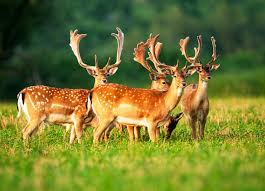

Caption: a group of deer antelopes in a forest



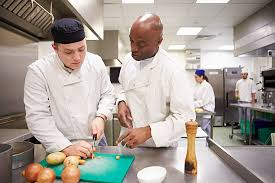

Caption: a chef in a kitchen with a knife and a knife



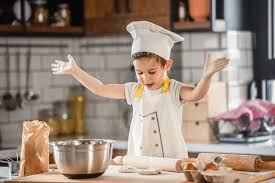

Caption:  a little girl in a kitchen with a pot of flour and a bowl of



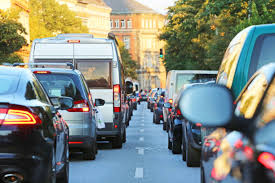

Caption: a city street with traffic jams and traffic jams



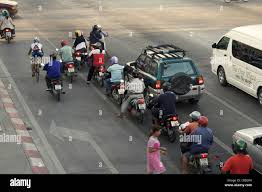

Caption: a view of a busy street in a city with a lot of people and vehicles



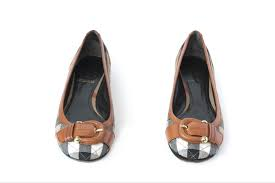

Caption: a pair of brown and brown leather boots with a buckle and a tan leather



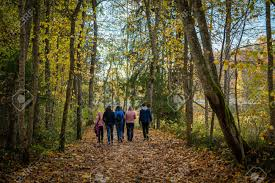

Caption: a group of people walking down a path in the woods in autumn



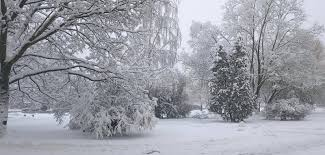

Caption: a snowy winter day in the park



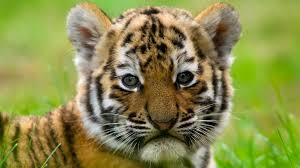

Caption: a tiger cub laying on the ground in a grassy field



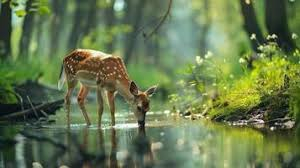

Caption: a deer drinking water in a forest



In [14]:
# ==============================
# STEP 6: Run Upload and Caption Function
# ==============================
captions = upload_and_caption()

Please upload up to 10 images...


Saving images (4).jpg to images (4) (2).jpg
Saving images (5).jpg to images (5) (1).jpg
Saving images (6).jpg to images (6).jpg
Saving images (7).jpg to images (7).jpg
Saving images (8).jpg to images (8).jpg
Saving images (9).jpg to images (9).jpg
Saving images (10).jpg to images (10).jpg
Saving images (11).jpg to images (11).jpg
Saving images (12).jpg to images (12).jpg
Saving images.jpg to images (13).jpg


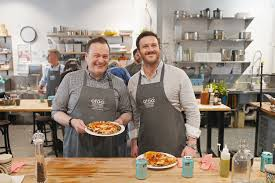

Caption: a chef and his assistant prepare a dish for the audience



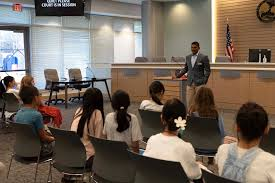

Caption: a student listens to a speaker in a classroom



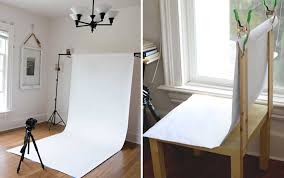

Caption: a diy white backdrop for a photo studio



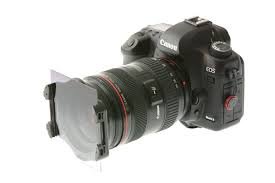

Caption: a camera lens holder for a canon eos eos 



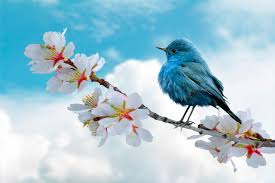

Caption: a blue bird perched on a branch with blossoms



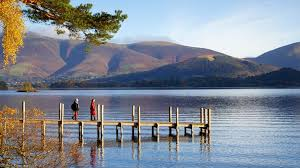

Caption: a couple on a wooden pier in the lake district



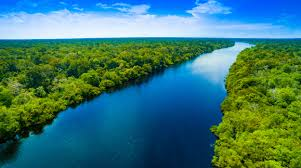

Caption: a river flows through a forest



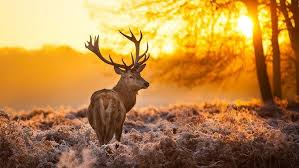

Caption: a deer stands in a field with a sunrise behind it



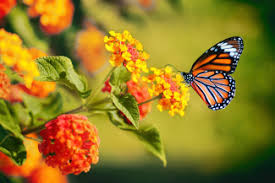

Caption: a butterfly flies on a flower



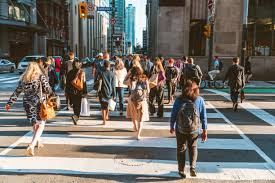

Caption: a group of people walking in a city street



In [16]:
# ==============================
# STEP 6: Run Upload and Caption Function
# ==============================
captions = upload_and_caption()